# MiniLab 1: Fuel Consumption Analysis

In [1]:
import pandas as pd
from isc301.config import home_raw_path 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import IsolationForest
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [2]:
print(home_raw_path)
df = pd.read_csv(home_raw_path) 
df.head()  

/home/robin/ml/project/301-Week1-ML-project/data/raw/maisons.csv


,surf_hab,qualite_materiau,surface_sous_sol,qualite_globale,n_garage_voitures,n_toilettes,n_cheminees,n_pieces,n_cuisines,n_chambres_coucher,annee_vente,prix,type_toit,type_batiment,qualite_cuisine,surface_jardin
0,1710,7,856,5,2,1,0,8,1,3,2008,208500,2 pans,individuelle,bonne,451.271415
1,1262,6,1262,8,2,0,1,6,1,3,2007,181500,2 pans,individuelle,moyenne,0.000000
2,1786,7,920,5,2,1,1,6,1,3,2008,223500,2 pans,individuelle,bonne,466.368854
3,1717,7,756,5,3,0,1,7,1,3,2006,140000,2 pans,individuelle,bonne,152.302986
4,2198,8,1145,5,3,1,1,9,1,4,2008,250000,2 pans,individuelle,bonne,378.184663


In [3]:
mapping_cuisine = {
    "mediocre": 0,
    "moyenne": 1,
    "bonne": 2,
    "excellente": 3
}
mapping_toit = {
    "2 pans": 0,
    "4 pans": 1,
    "mansarde": 2,
    "plat": 3,
    "1 pans": 4
}
mapping_type_batiment = {
    "individuelle": 0,
    "milieu de rangée": 1,
    "bout de rangée": 2,
    "duplex": 3,
    "individuelle reconvertie": 4
}
df["qualite_cuisine"] = df["qualite_cuisine"].replace(mapping_cuisine)
df["type_toit"] = df["type_toit"].replace(mapping_toit)
df["type_batiment"] = df["type_batiment"].replace(mapping_type_batiment)

X = df.loc[:, df.columns != 'prix']
y = df["prix"]


X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5
)
df

/tmp/ipykernel_4368/850405509.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["qualite_cuisine"] = df["qualite_cuisine"].replace(mapping_cuisine)
/tmp/ipykernel_4368/850405509.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["type_toit"] = df["type_toit"].replace(mapping_toit)
/tmp/ipykernel_4368/850405509.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the futur

,surf_hab,qualite_materiau,surface_sous_sol,qualite_globale,n_garage_voitures,n_toilettes,n_cheminees,n_pieces,n_cuisines,n_chambres_coucher,annee_vente,prix,type_toit,type_batiment,qualite_cuisine,surface_jardin
0,1710,7,856,5,2,1,0,8,1,3,2008,208500,0,0,2,451.271415
1,1262,6,1262,8,2,0,1,6,1,3,2007,181500,0,0,1,0.000000
2,1786,7,920,5,2,1,1,6,1,3,2008,223500,0,0,2,466.368854
3,1717,7,756,5,3,0,1,7,1,3,2006,140000,0,0,2,152.302986
4,2198,8,1145,5,3,1,1,9,1,4,2008,250000,0,0,2,378.184663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,1256,5,1256,6,1,1,0,6,1,3,2008,147500,0,0,1,468.918135
1360,10000,10,5000,10,4,3,3,15,2,6,2008,800000,0,0,3,1190.954402
1361,9500,10,5800,9,3,2,2,12,1,5,2007,750000,1,0,3,680.370176
1362,9200,9,5500,10,5,4,4,18,2,8,2009,950000,0,0,3,1586.297674


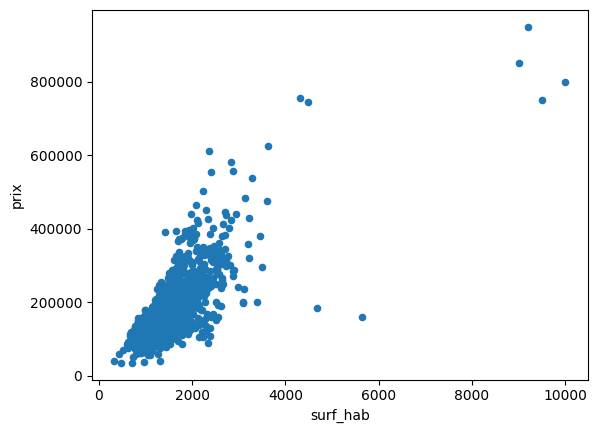

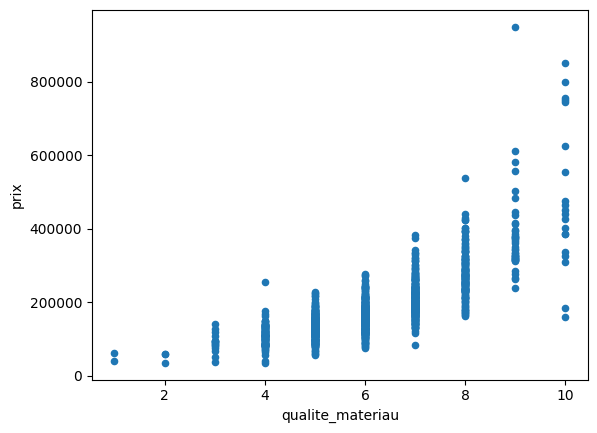

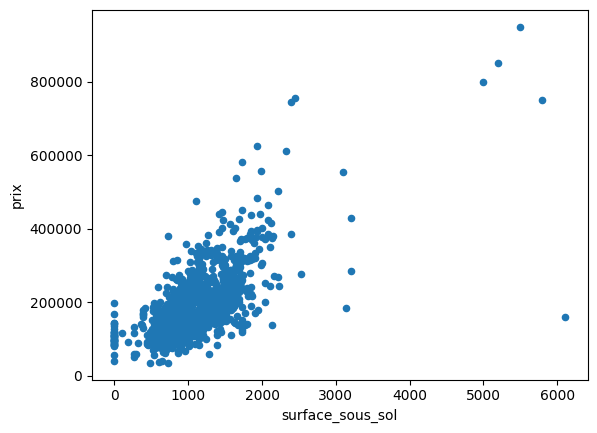

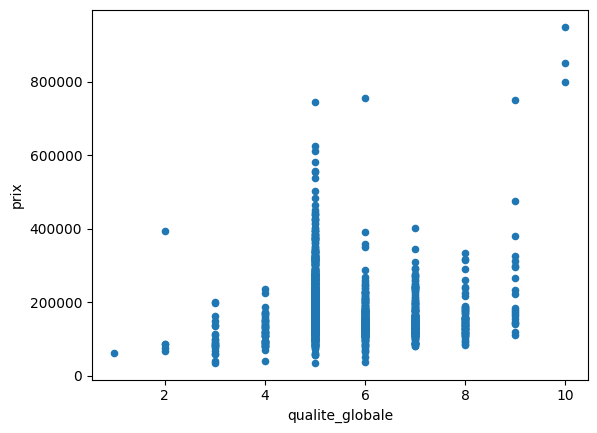

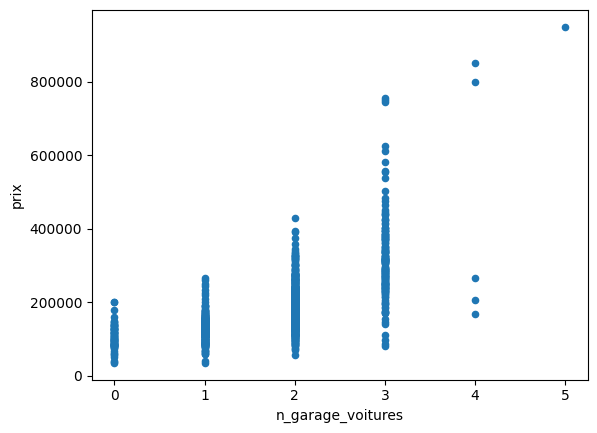

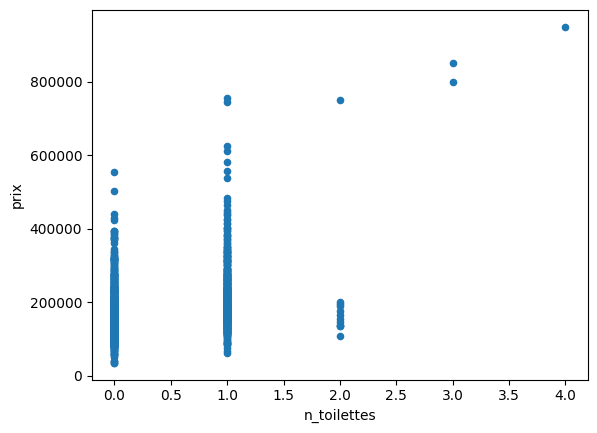

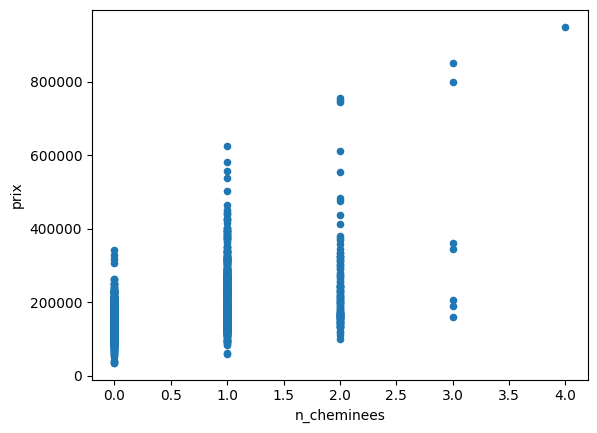

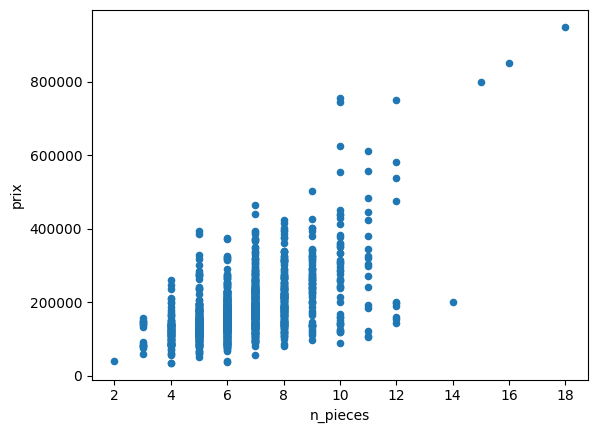

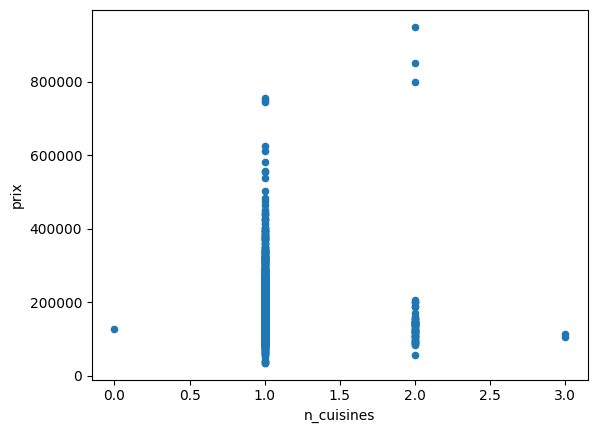

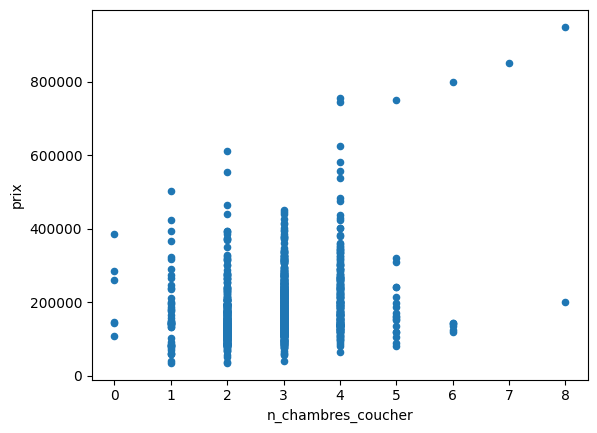

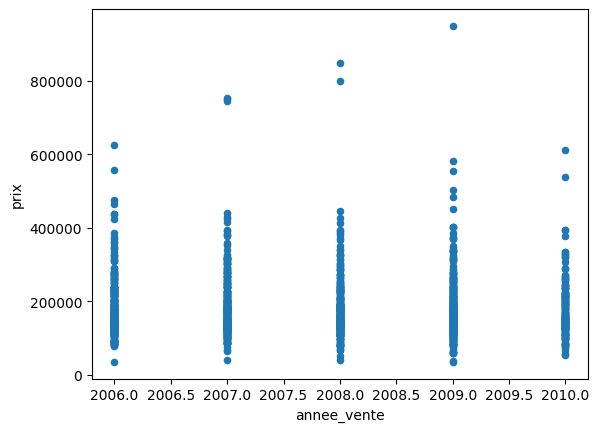

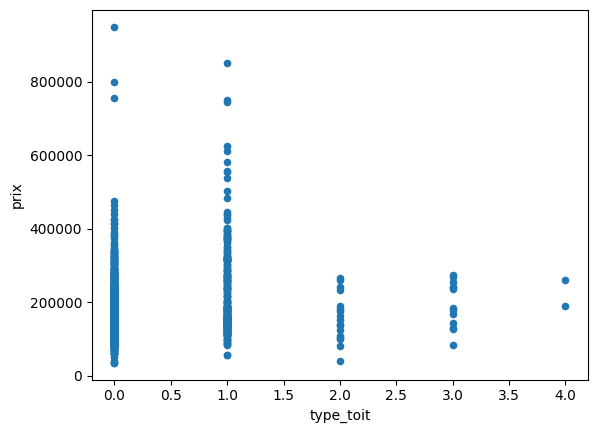

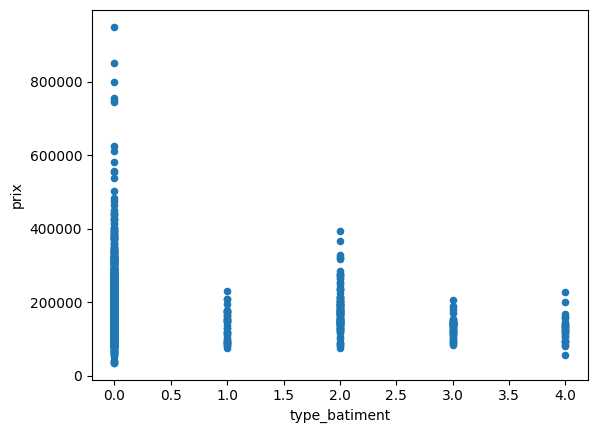

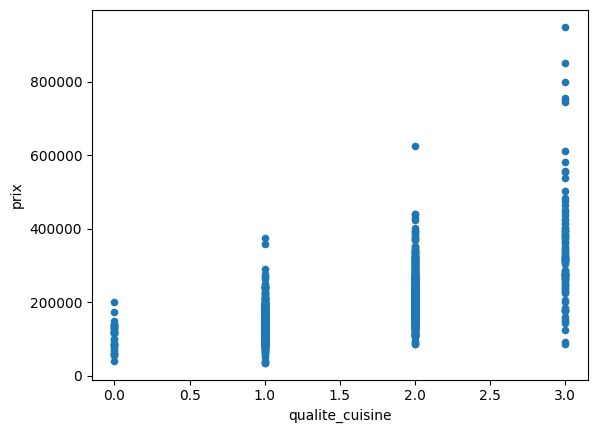

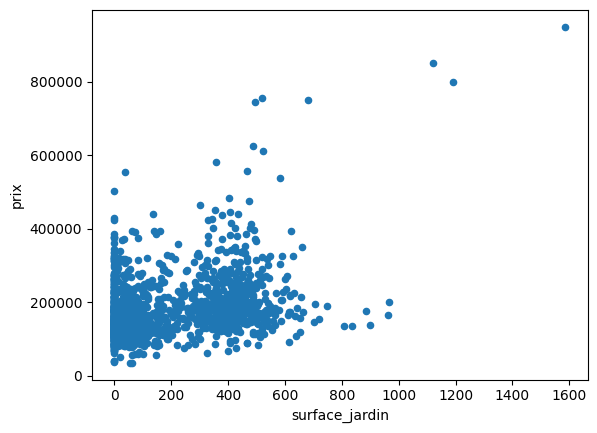

In [4]:
for col in df.columns:
    if col != 'prix':
        df.plot.scatter(x=col, y='prix')

In [5]:
model = LinearRegression()
model.fit(df[["surf_hab"]] , df["prix"])

a = model.coef_[0]   

surf_hab


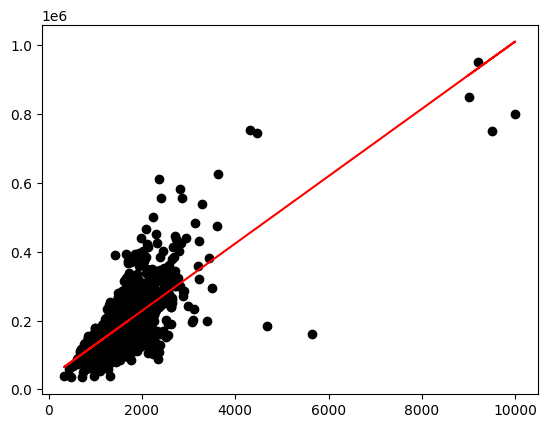

qualite_materiau


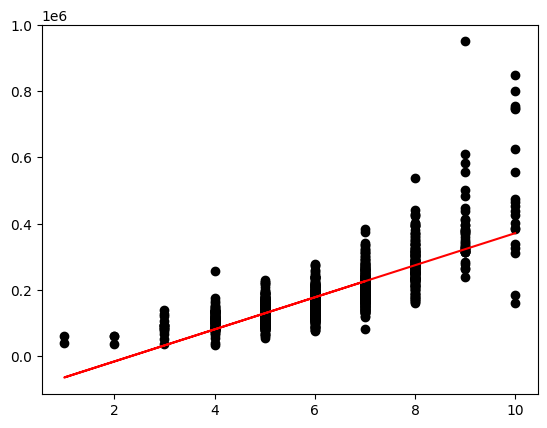

surface_sous_sol


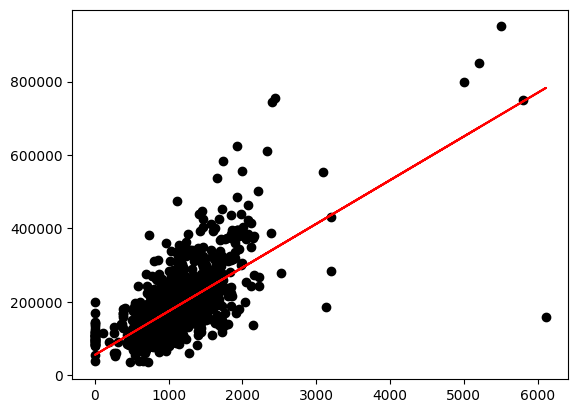

qualite_globale


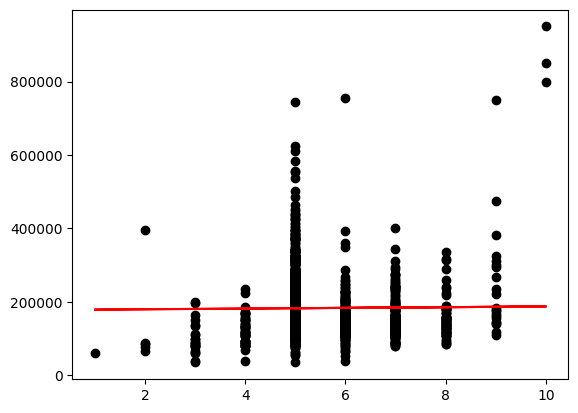

n_garage_voitures


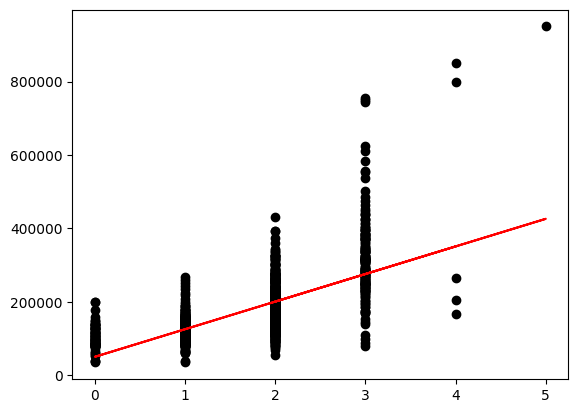

n_toilettes


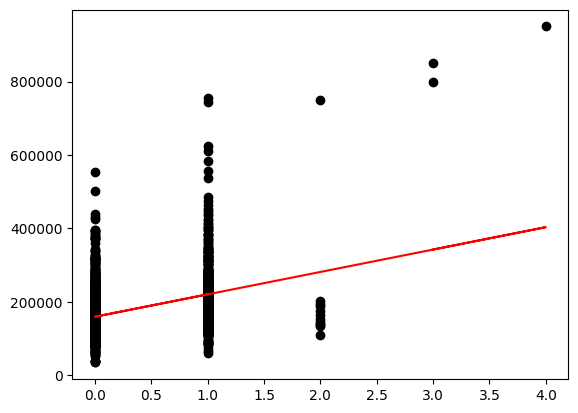

n_cheminees


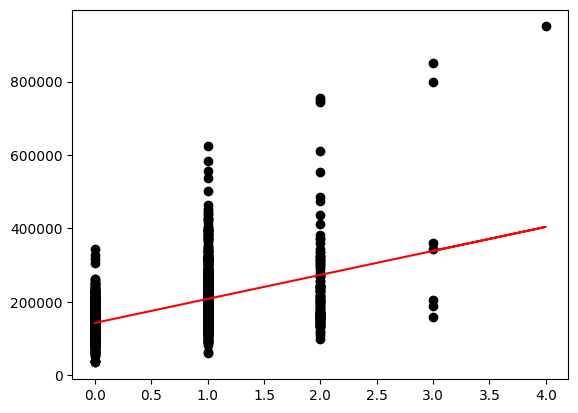

n_pieces


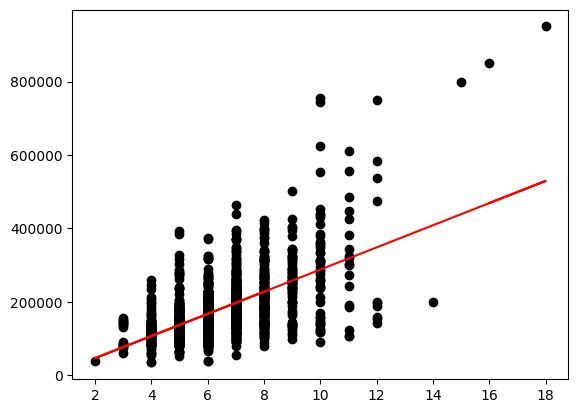

n_cuisines


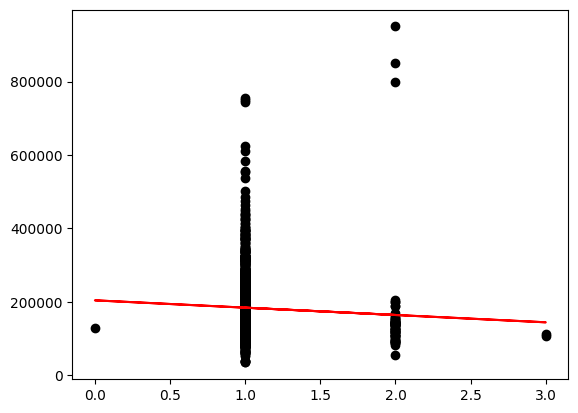

n_chambres_coucher


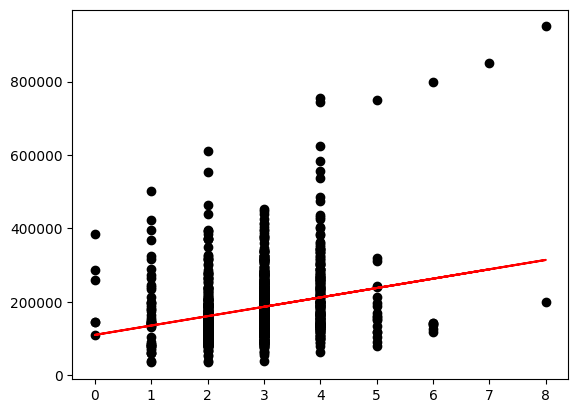

annee_vente


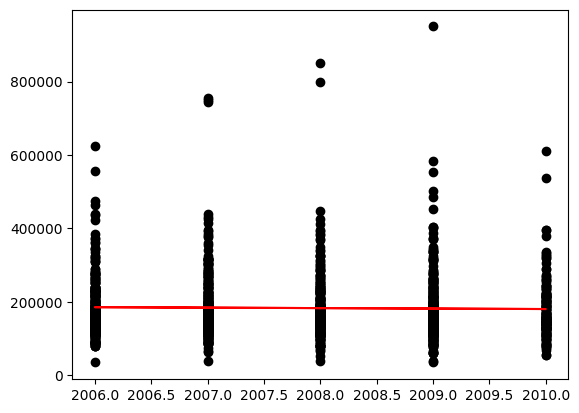

type_toit


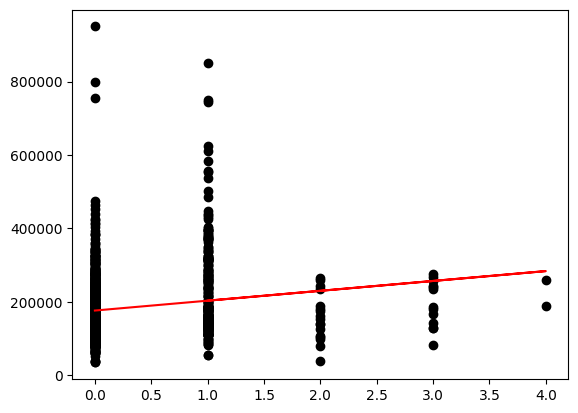

type_batiment


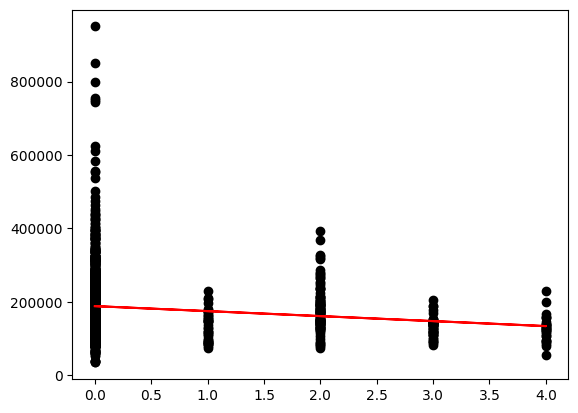

qualite_cuisine


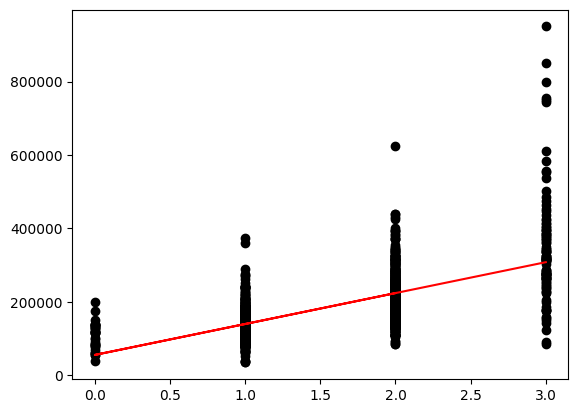

surface_jardin


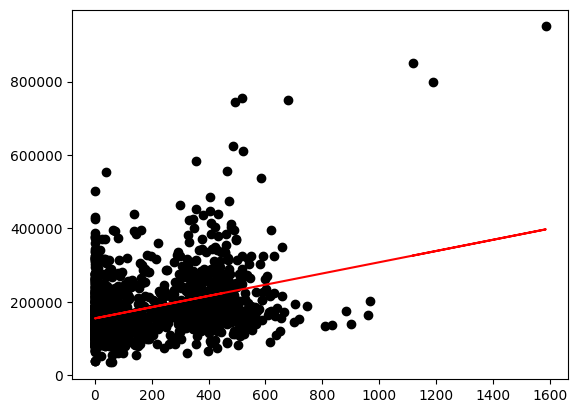

In [6]:

for col in df.columns:
    if col != 'prix':
        print(col)
        model = LinearRegression()
        model.fit(df[[col]] , df["prix"])
    
        a = model.coef_[0] 
        plt.scatter(df[col], df["prix"], color="black", label="data")
        plt.plot(df[col], model.predict(df[[col]]), color="red"  ,label="best")
        plt.show()


In [7]:
def plot_residual(y: np.ndarray, y_pred: np.ndarray):
    residuals = y - y_pred

    plt.scatter(y, residuals, alpha=0.6)
    plt.axhline(y=0, color="red", linestyle="--", linewidth=2)

    plt.xlabel("Actual Price")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title("Residuals vs Actual Price")
    plt.show()

In [ ]:

model = LinearRegression()
col_names = ["qualite_cuisine", "surf_hab","n_pieces","qualite_globale","type_batiment","type_toit","n_garage_voitures","surface_sous_sol","surface_jardin"]
model.fit(X_train[col_names], y_train)


print("train:", len(X_train))
print("val:", len(X_val))
print("test:", len(X_test))




train: 818
val: 273
test: 273


Train set evaluation:
R2: 0.783, MAE: 26263.408, RMSE: 40487.799


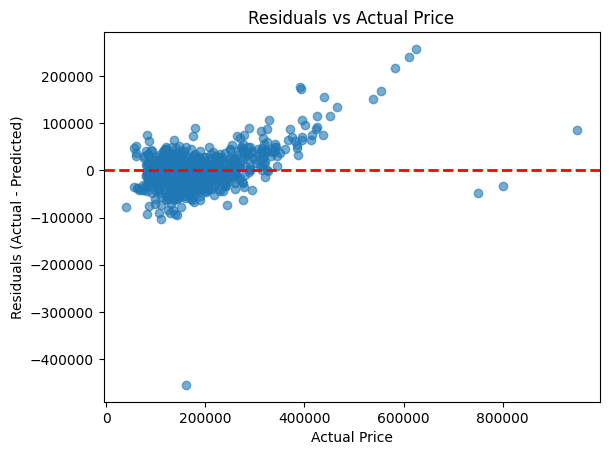

Validation:
R2: 0.733, MAE: 28729.349, RMSE: 41526.430


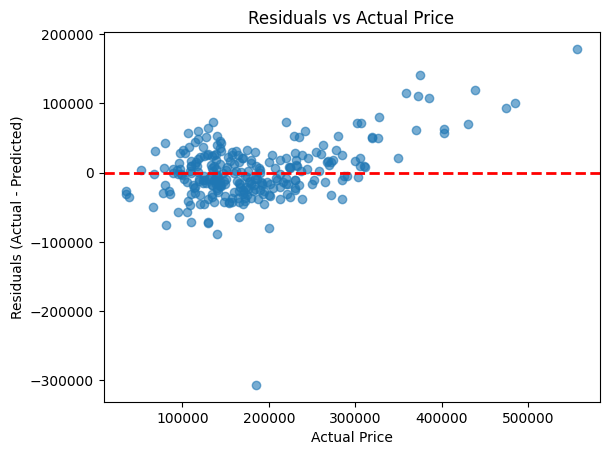

In [9]:
y_pred = model.predict(X_train[col_names])
r2   = r2_score(y_train, y_pred)
mae  = mean_absolute_error(y_train, y_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("Train set evaluation:")
print(f"R2: {r2:.3f}, MAE: {mae:.3f}, RMSE: {rmse:.3f}")
plot_residual(y_train, y_pred)



y_pred = model.predict(X_val[col_names])
r2   = r2_score(y_val, y_pred)
mae  = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Validation:")
print(f"R2: {r2:.3f}, MAE: {mae:.3f}, RMSE: {rmse:.3f}")
plot_residual(y_val, y_pred)

Test:
R2: 0.814, MAE: 25038.251, RMSE: 40763.176


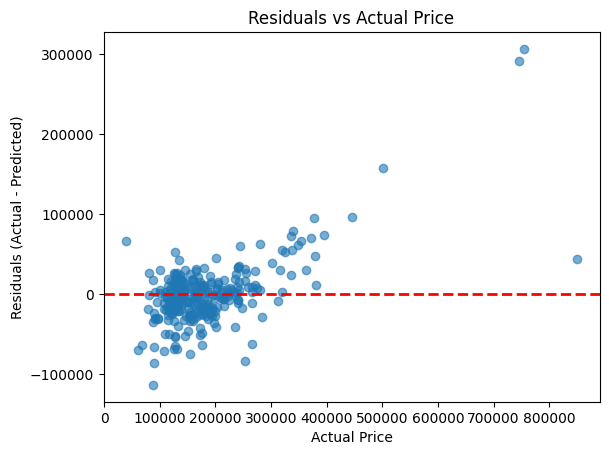

In [10]:
y_pred = model.predict(X_test[col_names])
r2   = r2_score(y_test , y_pred)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test:")
print(f"R2: {r2:.3f}, MAE: {mae:.3f}, RMSE: {rmse:.3f}")
plot_residual(y_test, y_pred)


/home/robin/ml/project/301-Week1-ML-project/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.611e+11, tolerance: 6.189e+08
  model = cd_fast.enet_coordinate_descent(


Lasso Train set evaluation:
R2: 0.884, MAE: 21268.513, RMSE: 29661.922


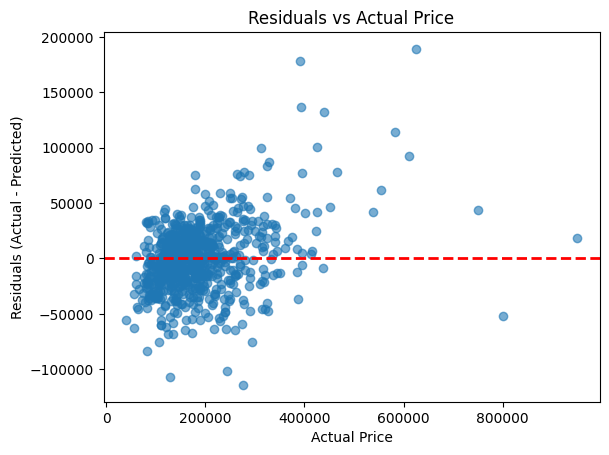

Lasso Validation:
R2: 0.753, MAE: 24719.828, RMSE: 39922.413


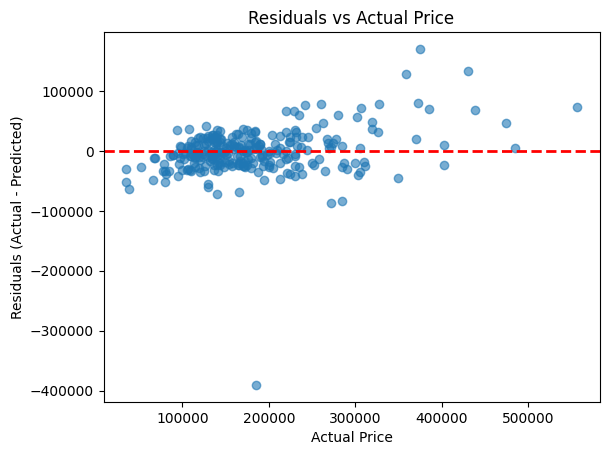

In [11]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train[col_names])

X_train_poly = poly.transform(X_train[col_names])
X_val_poly = poly.transform(X_val[col_names])

lasso = Lasso(alpha=10.0, max_iter=10000)
lasso.fit(X_train_poly, y_train)

y_pred = lasso.predict(X_train_poly)
r2   = r2_score(y_train, y_pred)
mae  = mean_absolute_error(y_train, y_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("Lasso Train set evaluation:")
print(f"R2: {r2:.3f}, MAE: {mae:.3f}, RMSE: {rmse:.3f}")
plot_residual(y_train, y_pred)

y_pred = lasso.predict(X_val_poly)
r2   = r2_score(y_val, y_pred)
mae  = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Lasso Validation:")
print(f"R2: {r2:.3f}, MAE: {mae:.3f}, RMSE: {rmse:.3f}")
plot_residual(y_val, y_pred)


Test:
R2: 0.864, MAE: 22891.837, RMSE: 34841.436


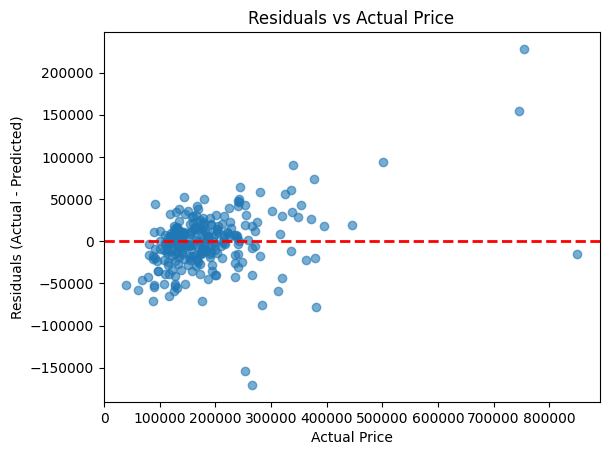

In [12]:
X_test_poly = poly.transform(X_test[col_names])

y_pred = lasso.predict(X_test_poly)
r2   = r2_score(y_test , y_pred)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test:")
print(f"R2: {r2:.3f}, MAE: {mae:.3f}, RMSE: {rmse:.3f}")
plot_residual(y_test, y_pred)
